In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
#tutaj funkcje obliczające dystans (Euklides i Mahalanobis)

#Euklides
#funkcja przyjmuje dwa wiersze danych
#i jedno i drugie daje to samo, które lepsze?
def dist_p1(X,C):
  return np.sqrt(np.dot((X - C), (X - C).T))

def dist_p(X,C):
  return np.sqrt(((X - C) ** 2).sum())

#Mahalanobis
def dist_m(X,C):
  V = np.linalg.inv(np.cov(X))
  sum = np.dot(np.dot((X - C), V),(X - C).T)
  return np.sqrt(sum)




In [3]:
def generate_centroids(X, k_clusters):
  rng = np.random.default_rng()
  C = rng.choice(X, k_clusters)
  return C

In [4]:
def populate_p_matrix(X, C, P):
  X = X.to_numpy()
  for index, row in enumerate(X):
    temp = []
    for centroid in C:
      temp.append(dist_p(row, centroid))

    P[index] = np.argmin(temp) + 1


In [5]:
def generate_new_centroids(X, P, k_clusters):
  new_P = pd.DataFrame(P.flatten(), columns=['cluster_number']) ### konwersja
  X = pd.concat([X, new_P], axis=1)
  C = X.groupby('cluster_number').mean()

  return C.to_numpy() ### konwersja

In [6]:
def k_means(X, k_clusters):
  P = np.empty((X.shape[0], 1))
  max_iters = 100
  iterations = 0

  #wybieramy losowe środki
  C = generate_centroids(X, k_clusters)
  old_C = np.zeros_like(C)
  old_P = np.ones_like(P)
  #ew np warunek typu "Jeśli C różni się od old_C w więcej niż 10 wierszach to zatrzymaj"
  #and not (C == old_C).all() #sum(P[i] != old_P[i] for i in range(len(C))) > 4 # nie działa dobrze
  #operands could not be broadcast together with shapes (5,2) (7,2)  czasami crashuje?
  while iterations < max_iters and not (C == old_C).all(): #to jest okej warunek stopu, ale przydało by się coś lepszego
    #print('help')
    old_C = C
    #wyliczamy odległości i aktualizujemy macierz przynależności
    populate_p_matrix(X, C, P)
    #generujemy nowe środki
    C = generate_new_centroids(X, P, 3)
    iterations += 1
  return X, P, C, iterations

In [7]:
def pca_transform(X, P, C):
    pca = PCA(n_components=2)
    X_2d = pca.fit_transform(X)
    C_2d = pca.transform(C)
    plt.title(list(X.columns))
    plt.scatter(x=X_2d[:,0], y=X_2d[:,1], c=P)
    plt.scatter(x=C_2d[:,0], y=C_2d[:,1], s=100, color='b', marker="X")
    plt.savefig(str(list(X.columns)))
    plt.show()

In [8]:
#jest niepoprawne

def grouping_quality(X, C):
  a = []
  for k in range(len(C) - 1):
    for l in range(k + 1, len(C)):
      a.append(dist_p(C[k,:], C[l,:]))

  #print(type(X))
  #print(type(C))
  new_P = pd.DataFrame(P.flatten(), columns=['cluster_number']) ### konwersja
  X = pd.concat([X, new_P], axis=1)
  #print(X)
  X = X.groupby('cluster_number')
  b = []
  for k in range(len(C)):
    for name, groups in X:
      for i, row in groups.iterrows():
        row = row.to_numpy()
        row = row[:-1]
        #to jest bardzo dziwne, ale działa
        #print(row)
        b.append(np.power((dist_p(row, C[k,:])),2))



  return np.sum(a)/np.sum(b)

     length  width
0     168.8   64.1
1     168.8   64.1
2     171.2   65.5
3     176.6   66.2
4     176.6   66.4
..      ...    ...
200   188.8   68.9
201   188.8   68.8
202   188.8   68.9
203   188.8   68.9
204   188.8   68.9

[205 rows x 2 columns]


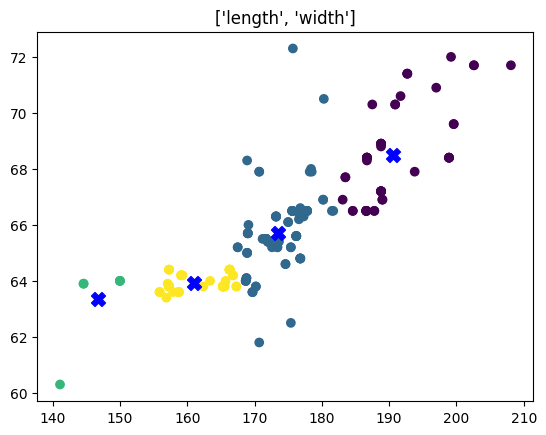

0.0003868923726238832


In [9]:
df = pd.read_csv('/autos.csv')
features = ['length', 'width']
df = df.dropna(subset=features, ignore_index=True)
data = df[features].copy()
print(data)
#data = ((data - data.min()) / (data.max() - data.min())) * 5
X, P, C, iterations = k_means(data, 4)
#print(P)
#print(X, C, iterations)
plt.title(list(X.columns))
plt.scatter(X['length'], X['width'], c=P)
plt.scatter(C[:,0], C[:,1], s=100, color='b', marker="X")
plt.savefig(str(list(X.columns)))
plt.show()
A = grouping_quality(X, C)
print(A)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


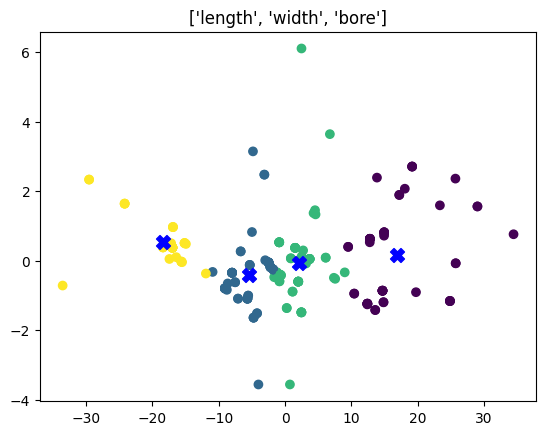

0.00043641846202916053


In [10]:
df = pd.read_csv('/autos.csv')
features = ['length', 'width', 'bore']
df = df.dropna(subset=features, ignore_index=True)
data = df[features].copy()
X, P, C, iterations = k_means(data, 4)
pca_transform(X, P, C)
A = grouping_quality(X, C)
print(A)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


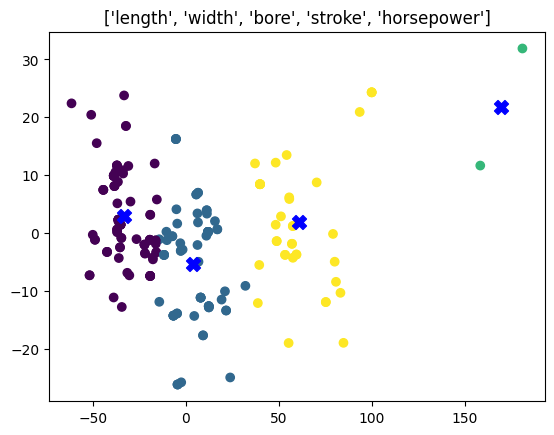

8.192498436501227e-05


In [11]:
df = pd.read_csv('/autos.csv')
features = ['length', 'width', 'bore', 'stroke', 'horsepower']
df = df.dropna(subset=features, ignore_index=True)
data = df[features].copy()
X, P, C, iterations = k_means(data, 4)
pca_transform(X, P, C)
A = grouping_quality(X, C)
print(A)